Florian Quintin
Project 1

Vous êtes nouvel embauché chez CoolCorp, une startup qui se spécialise dans l'analyse des désastres maritimes.
Un nouveau client, White Star Lines, se trouve face à un procès à travers le temps, affaire délicate.
Votre chef vous demande, en tant que seul data scientist chez CoolCorp, d'analyser les données `*.csv`.
WSL a déjà engagé un expert pour annoter une partie des données (`test.csv`) avec la survie ou pas des passagers.

In [123]:
# importation des différente librairie
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import math as mt
%matplotlib inline
import csv as csv

On peut commencer par afficher les premières lignes du fichier train.csv afain de mieux apréander des données sur les qu'elle nous allons travailler

In [125]:
df = pd.read_csv('train.csv', header=0)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Pour rappel :

    PassengerId : Le numéro d'embarquement du passager
    Survived : Indique si le passager a survécu (1) ou non (0)
    Pclass : La classe dans laquelle le passager était enregistré, 1, 2 ou 3.
    Name : Nom du passager
    Sex : Sexe du passager
    Age : Age du passager
    SibSp : Nombre de frères, soeurs épouse/époux du passager
    Parch : Nombre de pères/mères
    Ticket : Numéro du ticketdu passager
    Fare : Prix du ticker du passager
    Cabin : Numéro de cabine
    Embarked : Lieu d'embarcation


Nous alons meintenante nous intéreser à la colone Embarked qui se traduit par : C = Cherbourg; Q = Queenstown; S = Southampton

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


On peux remarquer que il y a que 889 passagés d'ont on sais le lieux d'embarquement, sur la liste de 891 que poséde le fichier. Se nombre est emplement sufisant pour travailler, nous alons donc ignorer les passagers d'ont on ne conner pas le lieux d'embarquement.

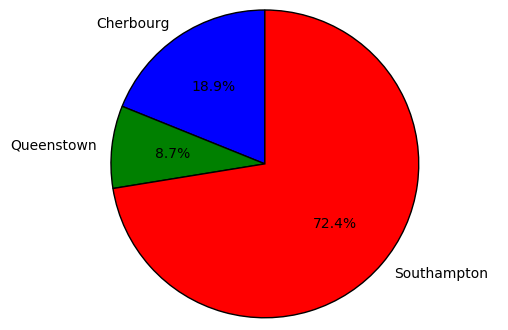

In [119]:
# Calcule du nombre de passager suivante le lieux d'emparquement

Cherbourg = df["Embarked"] == "C"
Queenstown = df["Embarked"] == "Q"
Southampton = df["Embarked"] == "S"

NbEmbarkedC = len(df[Cherbourg])
NbEmbarkedQ = len(df[Queenstown])
NbEmbarkedS = len(df[Southampton])

listData = [NbEmbarkedC, NbEmbarkedQ, NbEmbarkedS]
name = ['Cherbourg', 'Queenstown', 'Southampton']


plt.pie(listData, labels=name, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


On peux constater que une grand majoriter des passageés on embarqué à Southampton selà peux s'expliquer par le fait que le Titanic à commencer ça croisier dans son port, puis a embarquer de nouveau passager à Cherbourg et termine par Queenstown avant de commancer la trance Atlentique.

Nous alons meintenant nous interresser au personne qui on suvécu et du port dans le quel les survivants on embarqué

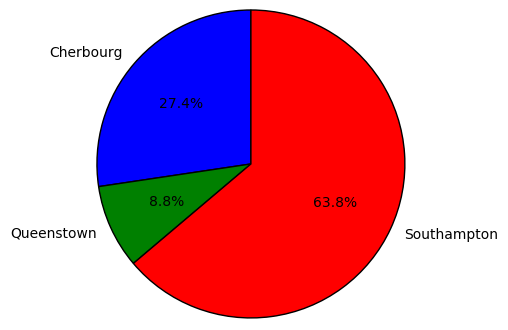

In [67]:
PassageSurvived = df["Survived"] == 1

Cherbourg = df["Embarked"] == "C"
Queenstown = df["Embarked"] == "Q"
Southampton = df["Embarked"] == "S"

NbSurvivedC = len(df[ PassageSurvived & Cherbourg ])
NbSurvivedQ = len(df[ PassageSurvived & Queenstown ])
NbSurvivedS = len(df[ PassageSurvived & Southampton ])

listData = [NbSurvivedC, NbSurvivedQ, NbSurvivedS]
name = ['Cherbourg', 'Queenstown', 'Southampton']


plt.pie(listData, labels=name, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()


On peux constater içi que le pourcentage de personnes qui on embarquer à Cherbourg et qui on suvécue est plus important que précédent, ma

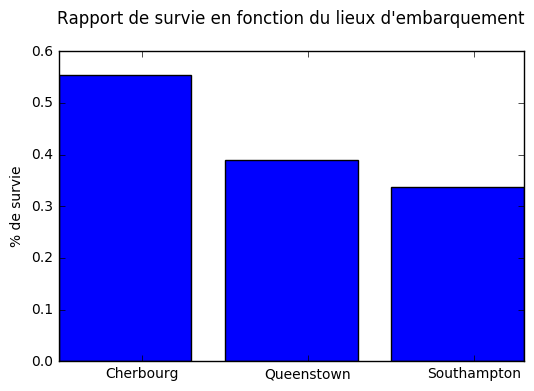

('Cherbourg :', 0.5535714285714286, '%')
('Queenstown :', 0.38961038961038963, '%')
('Southampton :', 0.33695652173913043, '%')


In [122]:
PassageSurvived = df["Survived"] == 1

Cherbourg = df["Embarked"] == "C"
Queenstown = df["Embarked"] == "Q"
Southampton = df["Embarked"] == "S"

NbEmbarkedC = len(df[Cherbourg])
NbEmbarkedQ = len(df[Queenstown])
NbEmbarkedS = len(df[Southampton])

NbSurvivedC = len(df[ PassageSurvived & Cherbourg ])
NbSurvivedQ = len(df[ PassageSurvived & Queenstown ])
NbSurvivedS = len(df[ PassageSurvived & Southampton ])

RaportC = float(NbSurvivedC) / float(NbEmbarkedC)
RaportQ = float(NbSurvivedQ) / float(NbEmbarkedQ)
RaportS = float(NbSurvivedS) / float(NbEmbarkedS)

#construction du diagramme
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_title('Rapport de survie en fonction du lieux d\'embarquement\n')
ax.set_ylabel('% de survie')
ax.set_xticklabels(['Cherbourg', 'Queenstown', 'Southampton'])
ax.set_xticks([0.5, 1.5, 2.5])

listData = [RaportC, RaportQ, RaportS]
ax.bar(range(len(listData)), listData)
plt.show()

print('Cherbourg :', RaportC, '%')
print('Queenstown :', RaportQ, '%')
print('Southampton :', RaportS, '%')

Pour conclure, on voir explicitement que les personnes qui on embarqué à Cherbourg on eux beaucoup plus de chance de survie que les deux autres lieux d'embarquement.